In [2]:
!pip install geopandas
!pip install rasterio
!pip install numpy
!pip install contextily

In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
import numpy as np
import contextily as cx

Load LA bus stops and DTLA major transit stops as geojson files for visualization

In [4]:
# Major LA County Transit Stops
major_transit_stops_la = gpd.read_file("../../data/preprocessed/la_major_transit_stops_la.geojson")
major_transit_stops_la.head()

OBJECTID  stop_id  route_count                         route_stop  \
0       980    19230            5  MT078, MT014, MT076, MT033, MT070   
1       981    19305            3                MT078, MT076, MT070   
2       982    19363            4         MT078, MT014, MT076, MT070   
3       983    19432            3                MT078, MT076, MT070   
4       984    19475            5  MT078, MT014, FZ707, MT076, MT070   

         lat         lon                     geometry  
0  34.035211 -118.265408  POINT (-118.26541 34.03521)  
1  34.036571 -118.264287  POINT (-118.26429 34.03657)  
2  34.038288 -118.263289  POINT (-118.26329 34.03829)  
3  34.040865 -118.260884  POINT (-118.26088 34.04087)  
4  34.042313 -118.259532  POINT (-118.25953 34.04231)

In [5]:
# Major DTLA County Transit Stops
major_transit_stops_dtla = gpd.read_file("../../data/preprocessed/la_major_transit_stops_dtla.geojson")
major_transit_stops_dtla.head()

OBJECTID  stop_id  route_count                         route_stop  \
0       980    19230            5  MT078, MT014, MT076, MT033, MT070   
1       981    19305            3                MT078, MT076, MT070   
2       982    19363            4         MT078, MT014, MT076, MT070   
3       983    19432            3                MT078, MT076, MT070   
4       984    19475            5  MT078, MT014, FZ707, MT076, MT070   

         lat         lon                     geometry  
0  34.035211 -118.265408  POINT (-118.26541 34.03521)  
1  34.036571 -118.264287  POINT (-118.26429 34.03657)  
2  34.038288 -118.263289  POINT (-118.26329 34.03829)  
3  34.040865 -118.260884  POINT (-118.26088 34.04087)  
4  34.042313 -118.259532  POINT (-118.25953 34.04231)

In [6]:
# LA Bus Stops
bus_stops = gpd.read_file("../../461/data/bus_stops.geojson")
bus_stops.head()

id  STOPNUM                             STOPNAME        LAT        LONG  \
0  0        1                  Paramount / Slauson  33.973248 -118.113113   
1  1        3                     Jefferson / 10th  34.025471 -118.328402   
2  2        6           120th / Augustus F Hawkins  33.924696 -118.242222   
3  3        7  120th / Martin Luther King Hospital  33.924505 -118.240369   
4  4       12                    15054 Sherman Way  34.201075 -118.461953   

  LINE_DIR1 LINE_DIR2  LINE_DIR3  LINE_DIR4  LINE_DIR5  ...  LINE_DIR8  \
0     265-S      None          0          0          0  ...          0   
1      35-N      None          0          0          0  ...          0   
2      53-N     120-W          0          0          0  ...          0   
3      53-N     120-E          0          0          0  ...          0   
4     162-E      None          0          0          0  ...          0   

   LINE_DIR9  LINE_DIR10  LINE_DIR11  LINE_DIR12  LINE_DIR13  LINE_DIR14  \
0          0           0           0           0           0           0   
1          0           0           0           0           0           0   
2          0           0           0           0           0           0   
3          0           0           0           0           0           0   
4          0           0           0           0           0           0   

    layer_id  feature_name                     geometry  
0  bus_stops      Bus Stop  POINT (-118.11311 33.97325)  
1  bus_stops      Bus Stop   POINT (-118.3284 34.02547)  
2  bus_stops      Bus Stop   POINT (-118.24222 33.9247)  
3  bus_stops      Bus Stop   POINT (-118.24037 33.9245)  
4  bus_stops      Bus Stop  POINT (-118.46195 34.20108)  

[5 rows x 22 columns]

Visualize bus stops and major transit stops

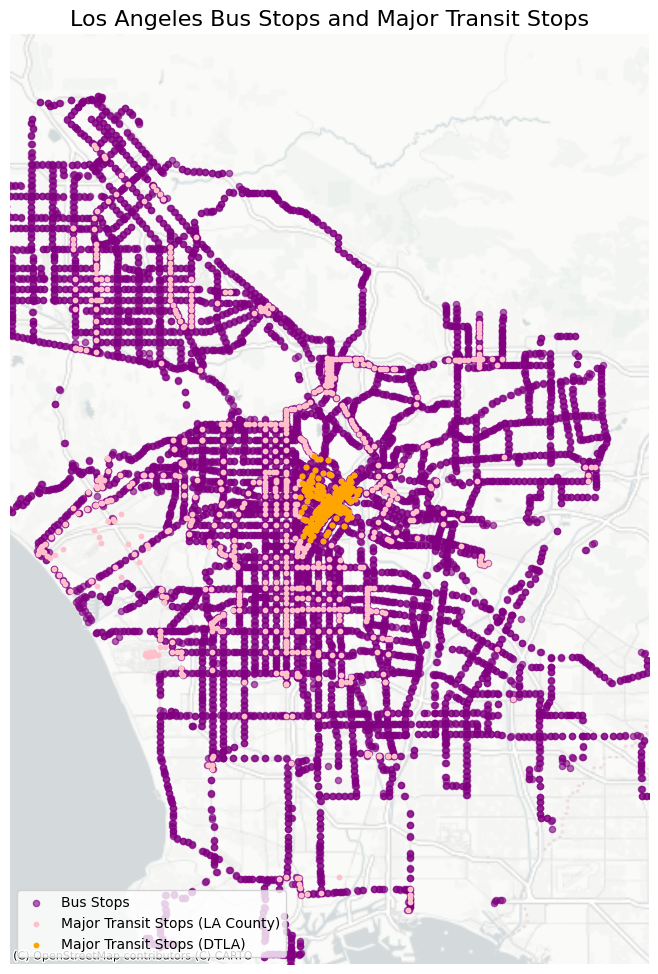

In [26]:
# Make sure both layers use the same projection (Web Mercator for basemap)
bus_stops = bus_stops.to_crs(epsg=3857)
major_transit_stops_la = major_transit_stops_la.to_crs(epsg=3857)
major_transit_stops_dtla = major_transit_stops_dtla.to_crs(epsg=3857)

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Plot all bus stops in light purple (lower zorder so they're underneath)
bus_stops.plot(ax=ax, color='purple', markersize=20, alpha=0.6, label='Bus Stops', zorder=1)

# Plot major transit stops (la county) in orange (on top)
major_transit_stops_la.plot(ax=ax, color='pink', markersize=10,
                         label='Major Transit Stops (LA County)', zorder=2)

# Plot major transit stops (dtla) in orange (on top)
major_transit_stops_dtla.plot(ax=ax, color='orange', markersize=10,
                         label='Major Transit Stops (DTLA)', zorder=3)

# Add basemap
cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels)

# OPTIONAL (to zoom in to dtla area)

# Get bounds of major transit stops
minx, miny, maxx, maxy = major_transit_stops_dtla.total_bounds

# Add some padding (increase padding_val to zoom out and decrease to zoom in)
padding_val = 5
x_pad = (maxx - minx) * padding_val
y_pad = (maxy - miny) * padding_val

# Set axis limits to zoom into the area with major transit stops
ax.set_xlim(minx - x_pad, maxx + x_pad)
ax.set_ylim(miny - y_pad, maxy + y_pad)


# Style tweaks
ax.set_axis_off()
ax.set_title('Los Angeles Bus Stops and Major Transit Stops', fontsize=16)
ax.legend(loc='lower left')
plt.tight_layout()
plt.show()


Load food assistance places, schools, and hospital clinics in dtla

In [8]:
# DTLA Food Assistance Stops
food_dtla = gpd.read_file("../../data/preprocessed/la_food_assistance_dtla.geojson")
food_dtla.head()

OBJECTID source     ext_id              cat1                     cat2  \
0     5092    211  3,173,516   Social Services          Food Assistance   
1     5139    211  3,173,517   Social Services          Food Assistance   
2     5944    211  3,173,794  Community Groups  Volunteer Opportunities   
3     5968    211  3,173,798   Social Services                 Clothing   
4     6139    211  3,173,960  Community Groups  Volunteer Opportunities   

                                                cat3  \
0                                                      
1                                    Senior Services   
2  Social Services, Food Assistance, Clothing, Do...   
3  Food Assistance, Housing Assistance and Inform...   
4                   Social Services, Food Assistance   

                   org_name                             name  \
0                      NULL     Union Church - Dining Center   
1                      NULL            Koreisha Chushoku Kai   
2               www.urm.org             Union Rescue Mission   
3                      NULL  Emmanuel Baptist Rescue Mission   
4  www.lacatholicworker.org         Hospitality Free Kitchen   

                addrln1 addrln2  ... longitude   date_updated dis_status  \
0          455 E 3Rd St          ...   -118.24  July 14, 2020              
1    244 S San Pedro St          ...   -118.24  July 14, 2020              
2  545 S. San Pedro St.          ...   -118.24  July 14, 2020              
3      530 E. Fifth St.          ...   -118.24  July 14, 2020              
4        821 E. 6th St.          ...   -118.24  July 14, 2020              

        POINT_X       POINT_Y  \
0  6,488,764.80  1,839,457.52   
1  6,488,385.32  1,839,889.43   
2  6,487,491.86  1,838,160.76   
3  6,488,023.28  1,838,304.32   
4  6,488,331.15  1,837,207.44   

                                             allcats  \
0                  |Social Services|Food Assistance|   
1  |Social Services|Senior Services|Food Assistance|   
2  |Social Services|Community Groups|Volunteer Op...   
3  |Social Services|Food Assistance|Housing Assis...   
4  |Social Services|Community Groups|Food Assista...   

                   nameUrlFriendly isCounty tags                     geometry  
0     union-church---dining-center        0       POINT (-118.24067 34.04669)  
1            koreisha-chushoku-kai        0       POINT (-118.24192 34.04787)  
2             union-rescue-mission        0       POINT (-118.24486 34.04311)  
3  emmanuel-baptist-rescue-mission        0        POINT (-118.2431 34.04351)  
4         hospitality-free-kitchen        0        POINT (-118.24208 34.0405)  

[5 rows x 34 columns]

In [9]:
# DTLA Schools
schools_dtla = gpd.read_file("../../data/preprocessed/la_schools_dtla.geojson")
schools_dtla.head()

OBJECTID       cat1                                 cat2             cat3  \
0      3226  Education                   Elementary Schools  Charter Schools   
1      3824  Education                   Elementary Schools  Charter Schools   
2      3845  Education  Elementary-High Combination Schools  Charter Schools   
3      3858  Education                   Elementary Schools   Public Schools   
4      3862  Education                         High Schools   Public Schools   

                                 name                               label  \
0               Jardin de la Infancia               Jardin de la Infancia   
1  N.E.W. Academy of Science and Arts  N.E.W. Academy of Science and Arts   
2                 New Designs Charter                 New Designs Charter   
3            Charles White Elementary            Charles White Elementary   
4                Orthopaedic Hospital                Orthopaedic Hospital   

                                 addrln1 addrln2         city state  ...  \
0  1400 S Broadway Los Angeles, CA 90015    None  Los Angeles    CA  ...   
1                   379 South Loma Drive    None  Los Angeles    CA  ...   
2                2303 South Figueroa Way    None  Los Angeles    CA  ...   
3                2401 Wilshire Boulevard    None  Los Angeles    CA  ...   
4                   300 West 23rd Street    None  Los Angeles    CA  ...   

                             organization  \
0  Los Angeles County Office of Education   
1                     Los Angeles Unified   
2                     Los Angeles Unified   
3                     Los Angeles Unified   
4                     Los Angeles Unified   

                                              source       source_id  \
0  California Department of Education (CDE): http...  19101990106880   
1  California Department of Education (CDE): http...  19647330100289   
2  California Department of Education (CDE): http...  19647330102541   
3  California Department of Education (CDE): http...  19647330106948   
4  California Department of Education (CDE): http...  19647330106997   

  source_date   latitude   longitude  enrollment      label_class  \
0  10/24/2023  34.035335 -118.262424        18.0  Charter Schools   
1   8/28/2024  34.059065 -118.266712       408.0  Charter Schools   
2    8/8/2024  34.031000 -118.275186       797.0  Charter Schools   
3   7/16/2024  34.060477 -118.279530       248.0   Public Schools   
4   8/17/2023  34.028920 -118.271170       679.0   Public Schools   

                     last_update                     geometry  
0  Mon, 10 Mar 2025 00:00:00 GMT  POINT (-118.26242 34.03533)  
1  Mon, 10 Mar 2025 00:00:00 GMT  POINT (-118.26671 34.05906)  
2  Mon, 10 Mar 2025 00:00:00 GMT    POINT (-118.27519 34.031)  
3  Mon, 10 Mar 2025 00:00:00 GMT  POINT (-118.27953 34.06048)  
4  Mon, 10 Mar 2025 00:00:00 GMT  POINT (-118.27117 34.02892)  

[5 rows x 21 columns]

In [10]:
# DTLA Hospitals
hospitals_dtla = gpd.read_file("../../data/preprocessed/la_hospitals_clinics_dtla.geojson")
hospitals_dtla.head()

Empty GeoDataFrame
Columns: [geometry]
Index: []

Visualize food assistance places, schools, and hospitals in relation to possible shade locations

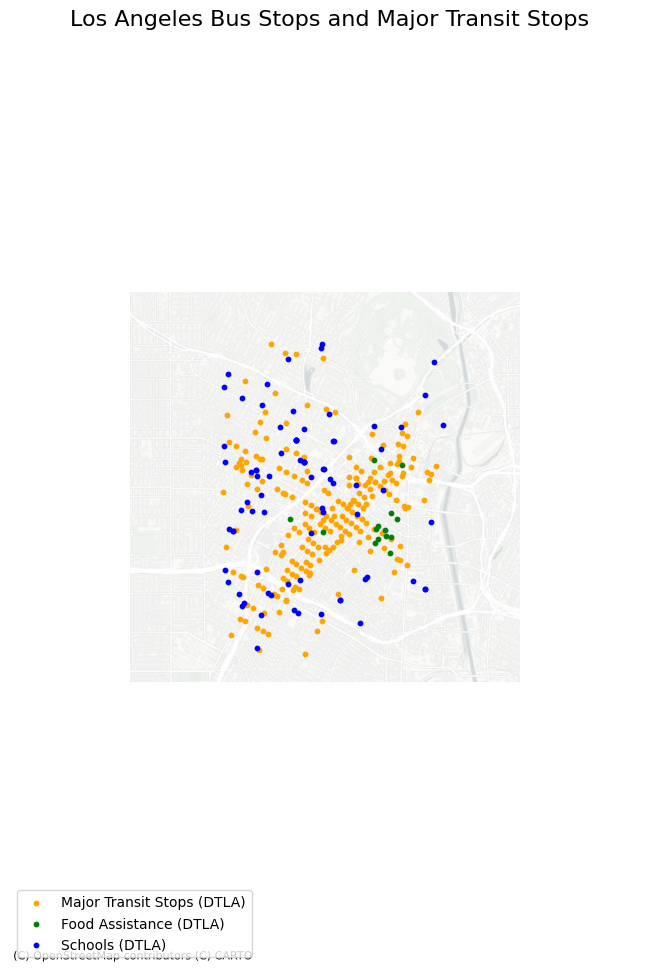

In [25]:
# Make sure both layers use the same projection (Web Mercator for basemap)
food_dtla = food_dtla.to_crs(epsg=3857)
schools_dtla = schools_dtla.to_crs(epsg=3857)

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Plot all bus stops in light purple (lower zorder so they're underneath)
# bus_stops.plot(ax=ax, color='purple', markersize=10, alpha=0.6, label='Bus Stops', zorder=1)

# Plot major transit stops (la county) in orange (on top)
# major_transit_stops_la.plot(ax=ax, color='pink', markersize=10, label='Major Transit Stops (LA County)', zorder=2)

# Plot major transit stops (dtla) in orange (on top)
major_transit_stops_dtla.plot(ax=ax, color='orange', markersize=10, label='Major Transit Stops (DTLA)', zorder=3)

# Plot food assistance (dtla)
food_dtla.plot(ax=ax, color='green', markersize=10,
                         label='Food Assistance (DTLA)', zorder=4)

# Plot schools (dtla)
schools_dtla.plot(ax=ax, color='blue', markersize=10,
                         label='Schools (DTLA)', zorder=4)

# Add basemap
cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels)

# OPTIONAL (to zoom in to dtla area)

# Get bounds of major transit stops
minx, miny, maxx, maxy = major_transit_stops_dtla.total_bounds

# Add some padding (increase padding_val to zoom out and decrease to zoom in)
padding_val = 1
x_pad = (maxx - minx) * padding_val
y_pad = (maxy - miny) * padding_val

# Set axis limits to zoom into the area with major transit stops
ax.set_xlim(minx - x_pad, maxx + x_pad)
ax.set_ylim(miny - y_pad, maxy + y_pad)


# Style tweaks
ax.set_axis_off()
ax.set_title('Los Angeles Bus Stops and Major Transit Stops', fontsize=16)
ax.legend(loc='lower left')
plt.tight_layout()
plt.show()

Visualize ucla shade mapping layer and map it onto the major transit stops

In [29]:
ucla_shade = gpd.read_file("../../data/preprocessed/ucla_shade_mapping_dtla.geojson")
print(f"UCLA Shade CRS: {ucla_shade.crs}")

# Now that we see it isn't in the right projection we can convert it to the standard Web Mercator Projection
shade_reprojected = ucla_shade.to_crs("EPSG:3857")
print(f"Corrected Shade CRS: {shade_reprojected.crs}")

UCLA Shade CRS: EPSG:4326
Corrected Shade CRS: EPSG:3857


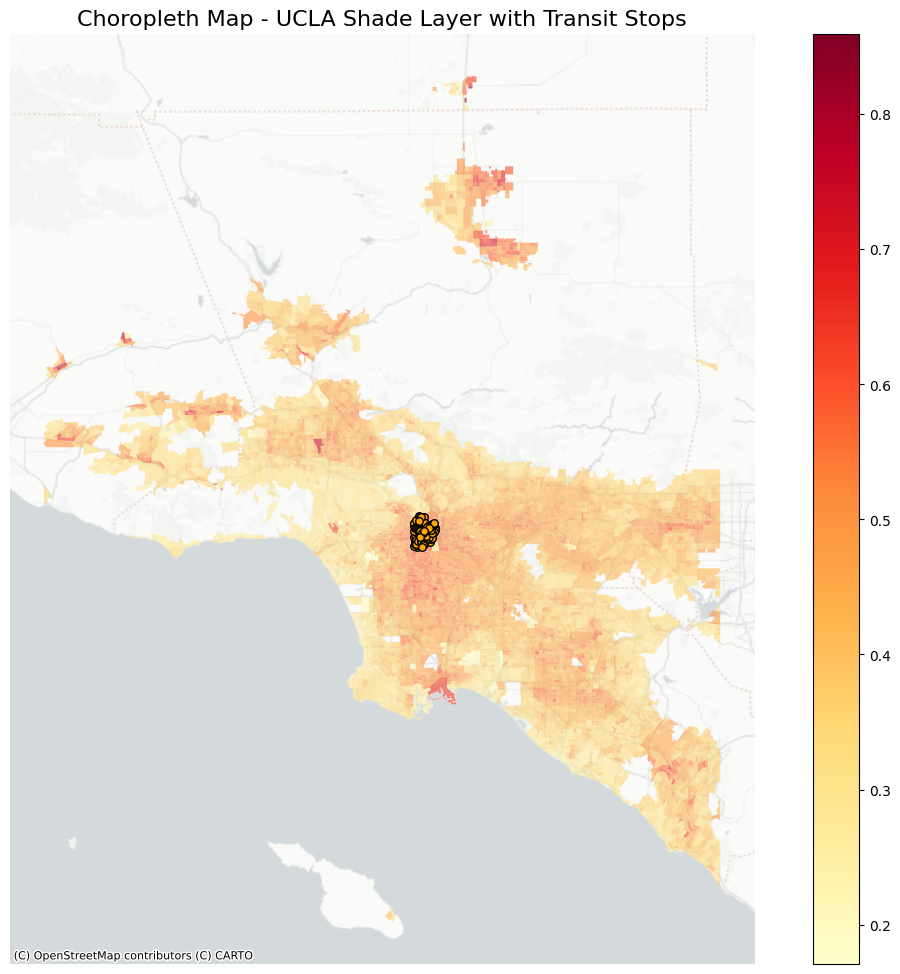

In [30]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Determine target column to plot (priority_i, tree_canopy)
target_variable = 'priority_i'

# Plot UCLA Shade layer as a choropleth
shade_reprojected.plot(
    ax=ax,
    column=target_variable,
    cmap='YlOrRd',
    legend=True,
    alpha=0.6  # slightly transparent so basemap shows through
)

# Plot bus stops in purple
# bus_stops.plot(ax=ax, color='purple', markersize=3, alpha=0.6, zorder=2)

# Plot major DTLA transit stops in orange
major_transit_stops_dtla.plot(ax=ax, color='orange', markersize=30, edgecolor='black', zorder=3)

# Add LA basemap
cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels)

# Title and labels
ax.set_title('Choropleth Map - UCLA Shade Layer with Transit Stops', fontsize=16)
ax.set_axis_off()

plt.tight_layout()
plt.show()

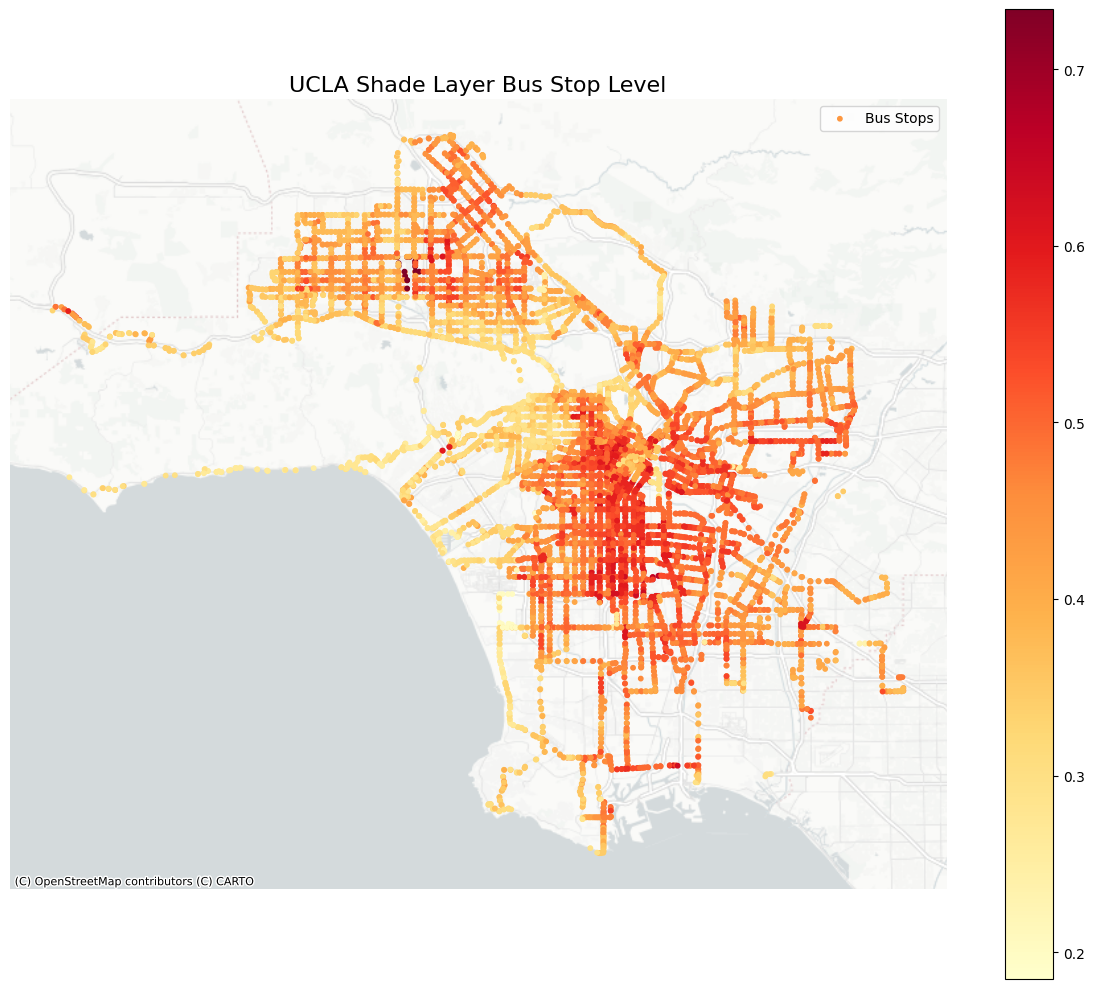

In [36]:
# This will do a join on all the bus stops with the polygon layers based on the intersection (the predicate)

bus_stops_shade = gpd.sjoin(bus_stops, shade_reprojected, how = 'left') # make sure you join dataframes that are in the same projection

# Now we can visualize the excess number of er visits by bus stops, although since the aggregation 
# is a the zip code level, there won't be much variation

fig, ax = plt.subplots(figsize = (12, 10))

bus_stops_shade.plot(ax = ax, label = "Bus Stops", column = target_variable,cmap='YlOrRd', markersize = 10, legend = True)

# For this map let's turn off the axis and add LA as the background map
cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, crs = bus_stops_shade.crs)
# if you are interested in more background/basemaps you can see the full list with the command cx.providers

ax.set_axis_off()
ax.set_title('UCLA Shade Layer Bus Stop Level', fontsize=16)


ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.legend()
plt.show()

Visualize excessive er visits and map it onto the major transit stops (same as official shade la plots)

In [15]:
excess_er = gpd.read_file("../../461/data/la_excess_er.geojson")
print(f"Excess ER Visits CRS: {excess_er.crs}")

# Now that we see it isn't in the right projection we can convert it to the standard Web Mercator Projection
excess_er_reprojected = excess_er.to_crs("EPSG:3857")
print(f"Corrected Excess ER Visits CRS: {excess_er_reprojected.crs}")

Excess ER Visits CRS: EPSG:3857
Corrected Excess ER Visits CRS: EPSG:3857


/var/folders/wl/c3pz93w50hz8v01l8clvl_qc0000gn/T/ipykernel_45153/1115772985.py:16: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


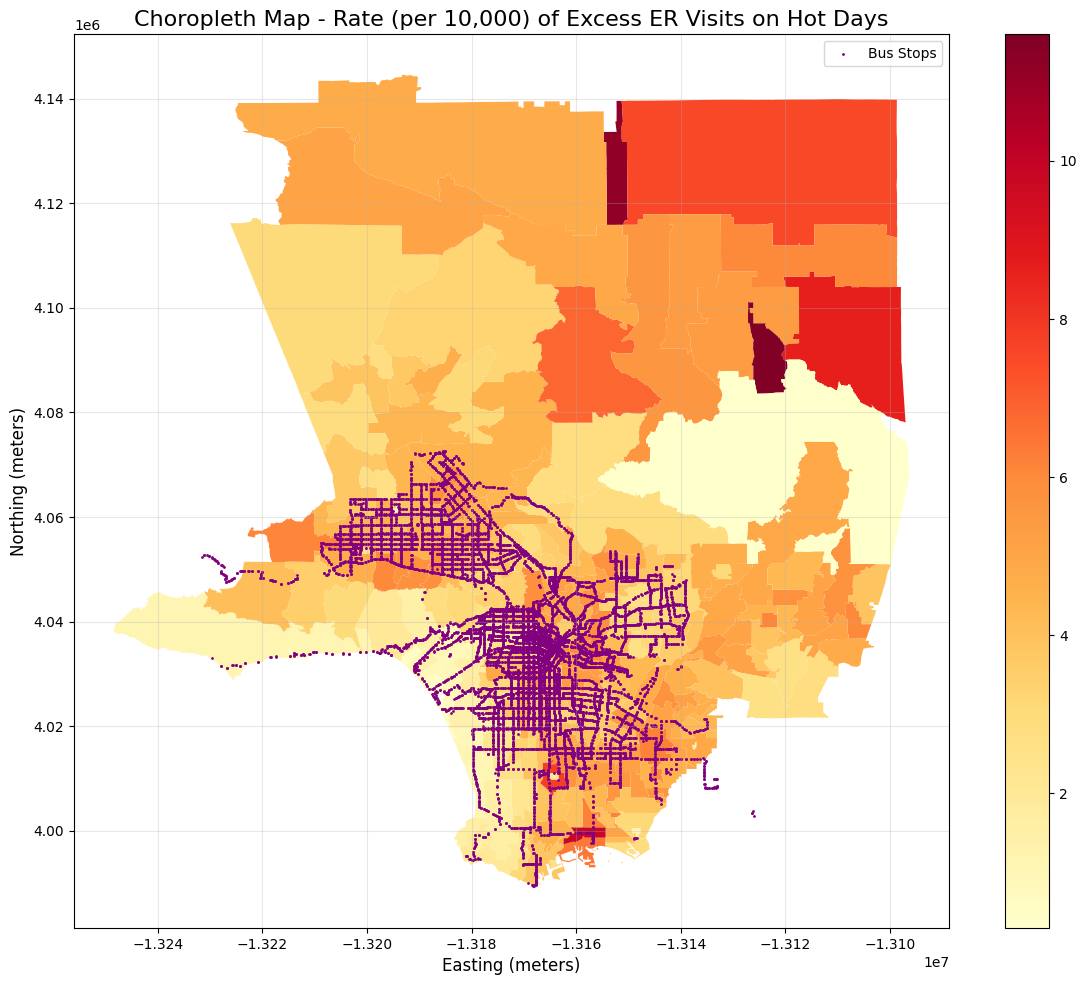

In [16]:
# Let's make a map of bus stops and excess er visits

fig, ax = plt.subplots(figsize = (12, 10))

# To make a choropleth map and show attribute data on the polygon data use the 'column' argument
excess_er_reprojected.plot(ax = ax, label = "Excess ER Visits", column = 'excs_ER',cmap='YlOrRd', legend = True)
bus_stops.plot(ax = ax, label = "Bus Stops", color = 'purple', markersize = 1)
# major_transit_stops_la.plot(ax = ax, label = "Major DTLA Transit Stops", color = 'purple', markersize = 1)

ax.set_title('Choropleth Map - Rate (per 10,000) of Excess ER Visits on Hot Days', fontsize=16)
ax.set_xlabel('Easting (meters)', fontsize=12)
ax.set_ylabel('Northing (meters)', fontsize=12)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.legend()
plt.show()

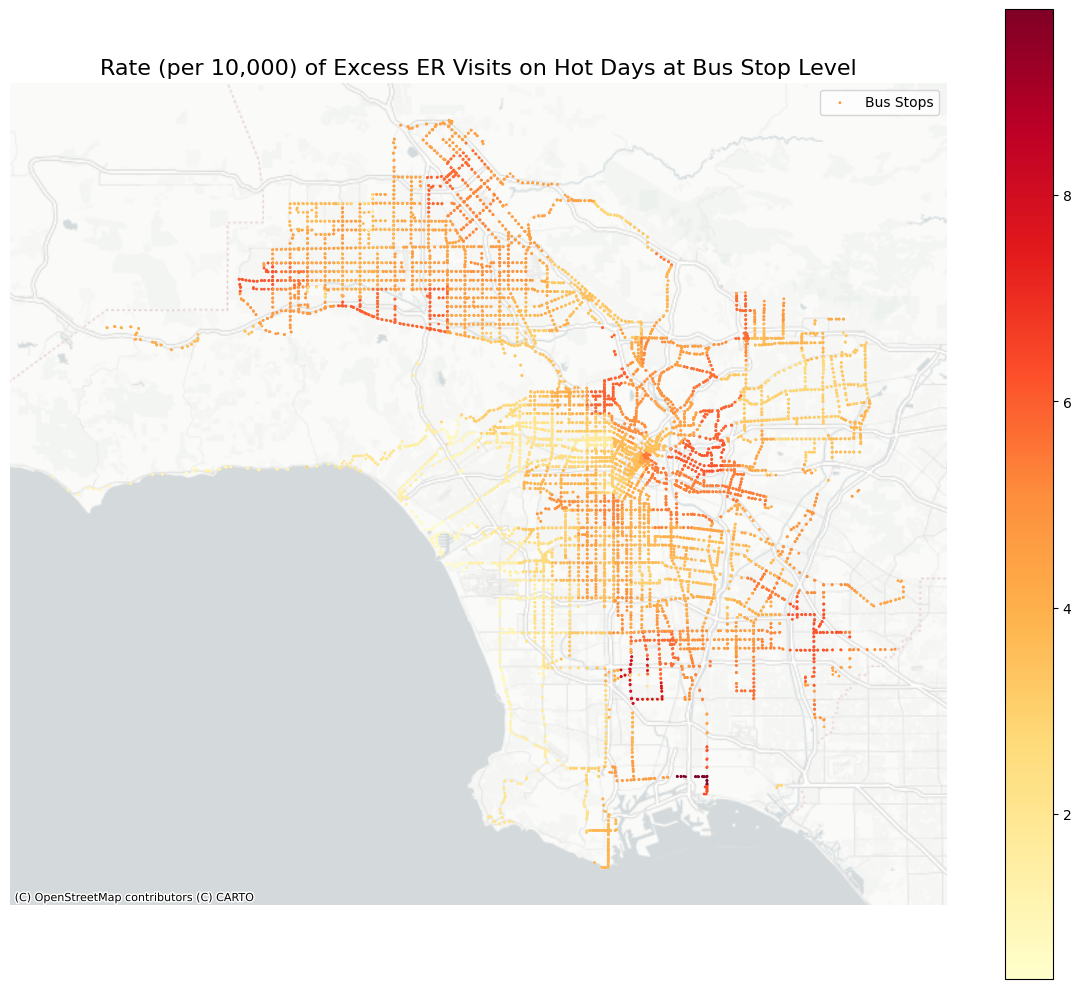

In [17]:
# This will do a join on all the bus stops with the polygon layers based on the intersection (the predicate)

bus_stops_excess_er = gpd.sjoin(bus_stops, excess_er_reprojected, how = 'left') # make sure you join dataframes that are in the same projection
la_stops_excess_er = gpd.sjoin(major_transit_stops_la, excess_er_reprojected, how = 'left') # make sure you join dataframes that are in the same projection


# Now we can visualize the excess number of er visits by bus stops, although since the aggregation 
# is a the zip code level, there won't be much variation

fig, ax = plt.subplots(figsize = (12, 10))

bus_stops_excess_er.plot(ax = ax, label = "Bus Stops", column = 'excs_ER',cmap='YlOrRd', markersize = 1, legend = True)
# la_stops_excess_er.plot(ax = ax, label = "LA Stops", column = 'excs_ER',cmap='YlOrRd', markersize = 1, legend = True)

# For this map let's turn off the axis and add LA as the background map
cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, crs = bus_stops_excess_er.crs)
# if you are interested in more background/basemaps you can see the full list with the command cx.providers

ax.set_axis_off()
ax.set_title('Rate (per 10,000) of Excess ER Visits on Hot Days at Bus Stop Level', fontsize=16)


ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.legend()
plt.show()

Visualize below poverty rate layer and map it onto the major bus stops

In [18]:
below_poverty = gpd.read_file("../../data/preprocessed/below_poverty_dtla.geojson")
print(f"Below Poverty CRS: {below_poverty.crs}")

# Now that we see it isn't in the right projection we can convert it to the standard Web Mercator Projection
poverty_reprojected = below_poverty.to_crs("EPSG:3857")
print(f"Corrected Poverty CRS: {poverty_reprojected.crs}")

Below Poverty CRS: EPSG:2229
Corrected Poverty CRS: EPSG:3857


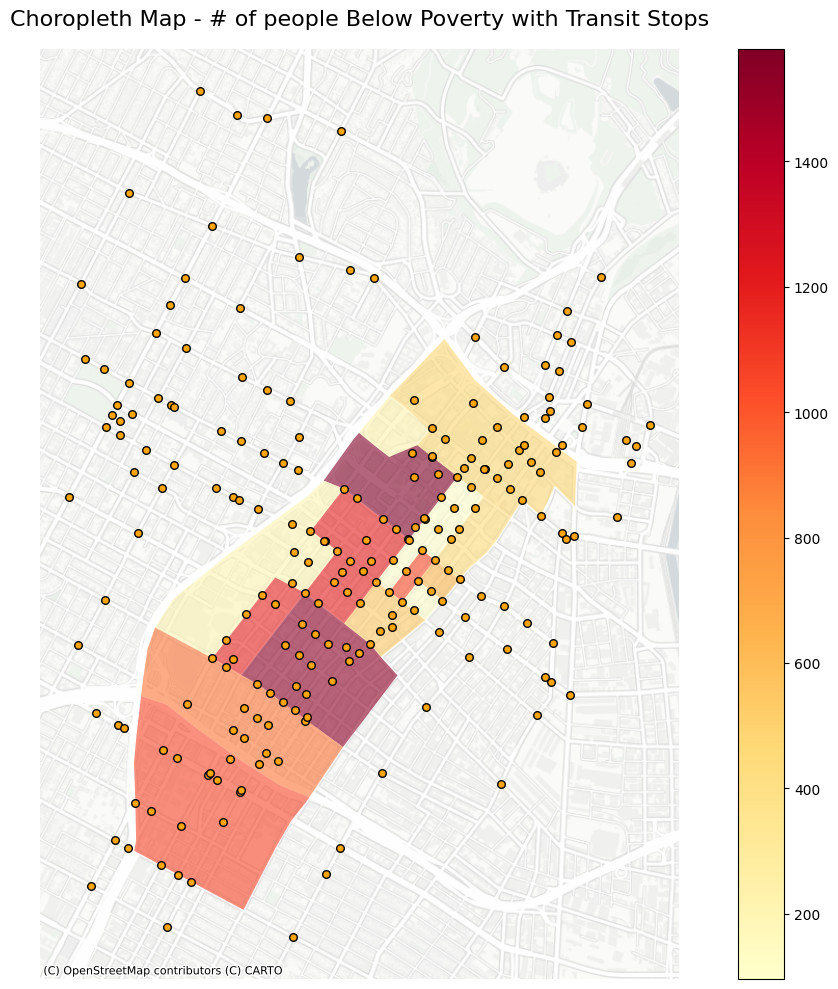

In [19]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Determine target column to plot (priority_i, tree_canopy)
target_variable = 'below_fpl'

# Plot UCLA Shade layer as a choropleth
poverty_reprojected.plot(
    ax=ax,
    column=target_variable,
    cmap='YlOrRd',
    legend=True,
    alpha=0.6  # slightly transparent so basemap shows through
)

# Plot bus stops in purple
# bus_stops.plot(ax=ax, color='purple', markersize=3, alpha=0.6, zorder=2)

# Plot major DTLA transit stops in orange
major_transit_stops_dtla.plot(ax=ax, color='orange', markersize=30, edgecolor='black', zorder=3)

# Add LA basemap
cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels)

# Title and labels
ax.set_title('Choropleth Map - # of people Below Poverty with Transit Stops', fontsize=16)
ax.set_axis_off()

plt.tight_layout()
plt.show()

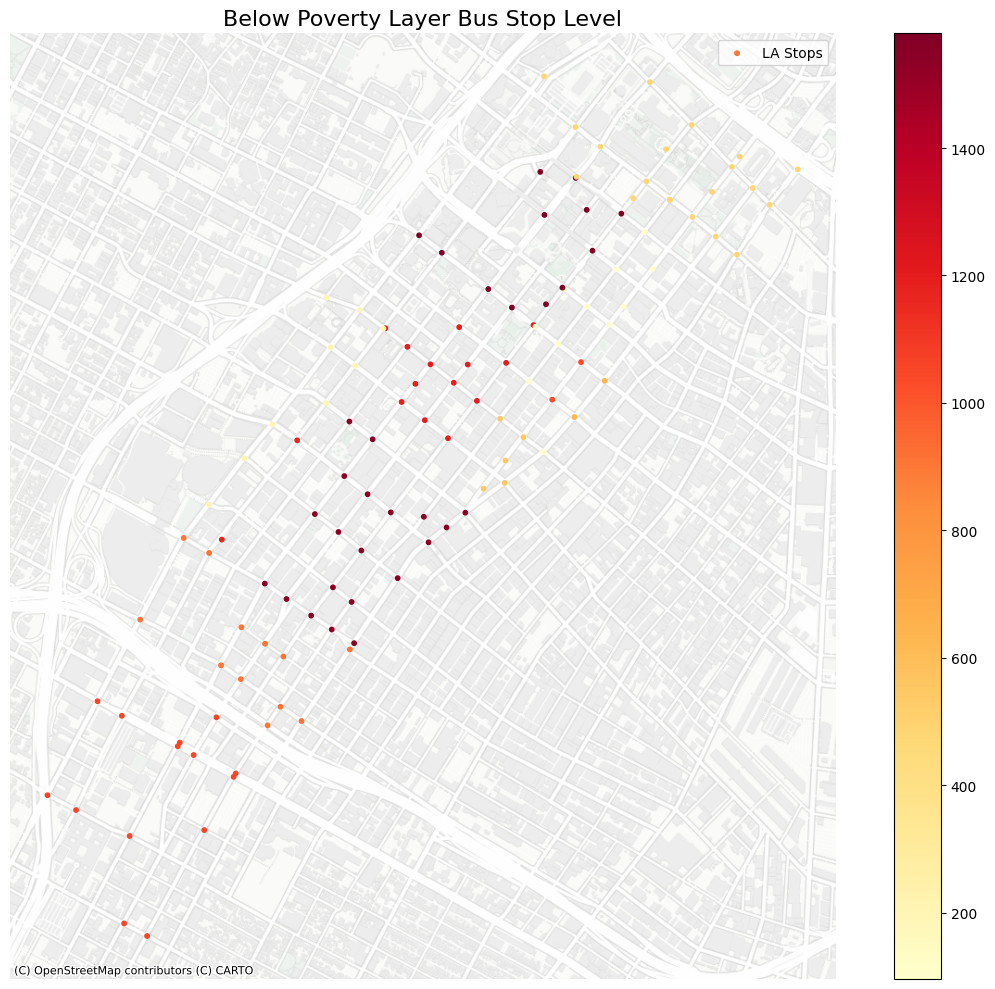

In [20]:
# This will do a join on all the bus stops with the polygon layers based on the intersection (the predicate)

bus_stops_poverty = gpd.sjoin(bus_stops, poverty_reprojected, how = 'left') # make sure you join dataframes that are in the same projection
la_stops_poverty = gpd.sjoin(major_transit_stops_la, poverty_reprojected, how = 'left') # make sure you join dataframes that are in the same projection


# Now we can visualize the excess number of er visits by bus stops, although since the aggregation 
# is a the zip code level, there won't be much variation

fig, ax = plt.subplots(figsize = (12, 10))

# bus_stops_poverty.plot(ax = ax, label = "Bus Stops", column = target_variable,cmap='YlOrRd', markersize = 10, legend = True)
la_stops_poverty.plot(ax = ax, label = "LA Stops", column = target_variable,cmap='YlOrRd', markersize = 10, legend = True)

# For this map let's turn off the axis and add LA as the background map
cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, crs = la_stops_poverty.crs)
# if you are interested in more background/basemaps you can see the full list with the command cx.providers

ax.set_axis_off()
ax.set_title('Below Poverty Layer Bus Stop Level', fontsize=16)


ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.legend()
plt.show()